# Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
my_dataset = pd.read_csv(r"C:\Users\hp\Downloads\framingham_heart_disease.csv")
my_dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
# Checking if there is null values
my_dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Filling the null values

In [23]:
my_dataset["education"] = my_dataset["education"].fillna(my_dataset["education"].mode()[0])

In [24]:
import math
my_dataset["cigsPerDay"] = my_dataset["cigsPerDay"].fillna(math.floor(my_dataset["cigsPerDay"].mean()))

In [28]:
my_dataset["BPMeds"] = my_dataset["BPMeds"].fillna(my_dataset["BPMeds"].mode()[0])

In [31]:
my_dataset["totChol"] = my_dataset["totChol"].fillna(math.floor(my_dataset["totChol"].mean()))

In [33]:
my_dataset["BMI"] = my_dataset["BMI"].fillna(my_dataset["BMI"].mean())

In [36]:
my_dataset["heartRate"] = my_dataset["heartRate"].fillna(math.floor(my_dataset["heartRate"].mean()))

In [37]:
my_dataset["glucose"] = my_dataset["glucose"].fillna(math.floor(my_dataset["glucose"].mean()))

In [38]:
my_dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Exploratory Data Analysis

In [40]:
# Let's have a look at the gender
gender = my_dataset["male"].value_counts()

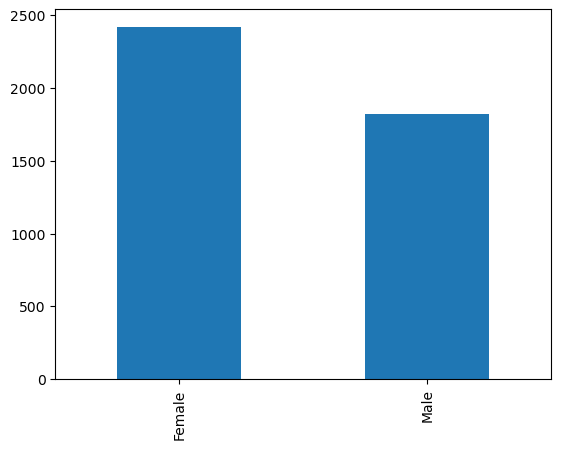

In [47]:
gender.plot(kind="bar")
plt.xticks([0,1],["Female","Male"])
plt.show()

### Distribution of the ages

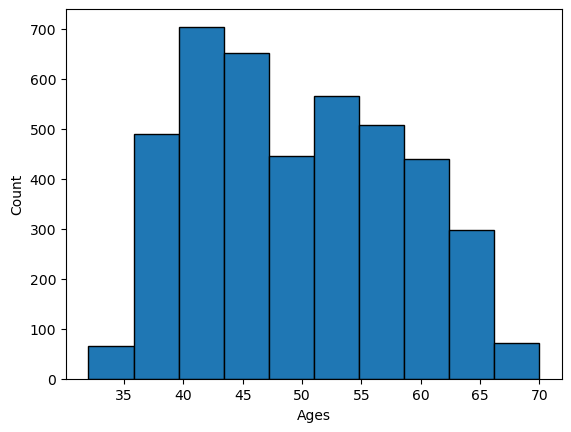

In [50]:
plt.hist(x=my_dataset["age"],edgecolor="black")
plt.xlabel("Ages")
plt.ylabel("Count")
plt.show()

### Education levels

In [55]:
education_levels = my_dataset["education"].value_counts()
education_levels

1.0    1825
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

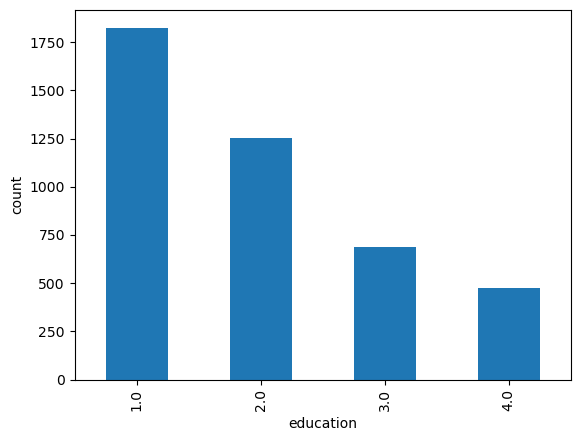

In [57]:
education_levels.plot(kind="bar")
plt.xlabel("education")
plt.ylabel("count")
plt.show()

## Let's look at the number of people who are smokers and those who are not

In [61]:
number_of_smokers = my_dataset["currentSmoker"].value_counts()
number_of_smokers

0    2144
1    2094
Name: currentSmoker, dtype: int64

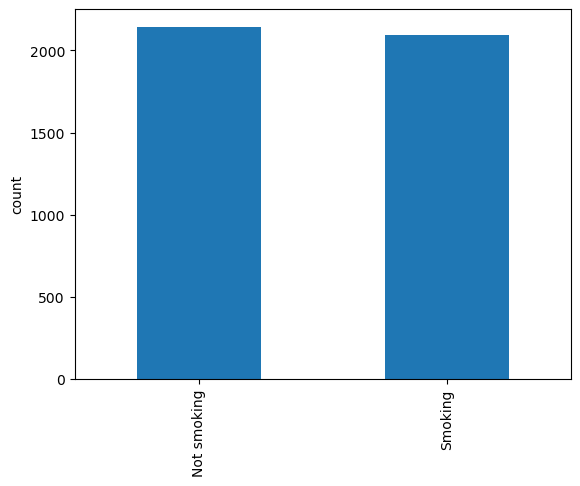

In [65]:
number_of_smokers.plot(kind="bar")
plt.xticks([0,1],["Not smoking","Smoking"])
plt.ylabel("count")
plt.show()

<AxesSubplot:ylabel='currentSmoker'>

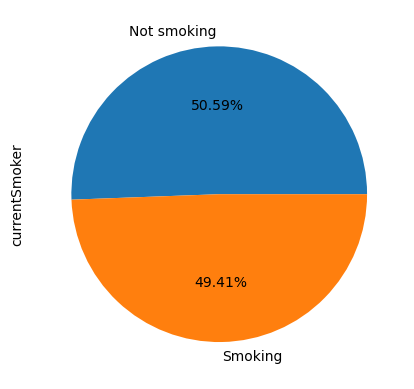

In [68]:
labels = ["Not smoking","Smoking"]
number_of_smokers.plot(kind="pie",autopct="%.2f%%",labels=labels)

## Distribution of the number of cigarretes per day

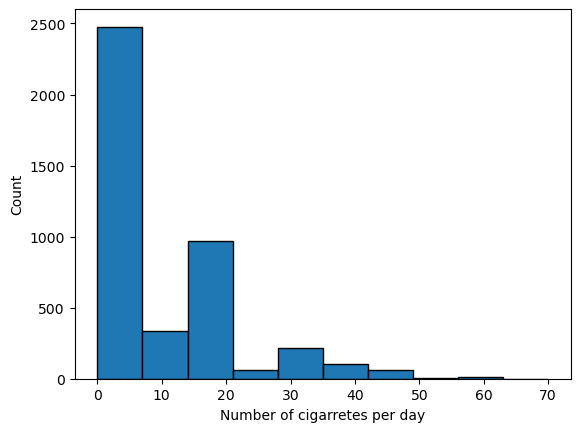

In [72]:
plt.hist(x = my_dataset["cigsPerDay"],edgecolor="black")
plt.xlabel("Number of cigarretes per day")
plt.ylabel("Count")
plt.show()

### BPMeds Count

In [77]:
BPMeds_count = my_dataset["BPMeds"].value_counts()
BPMeds_count

0.0    4114
1.0     124
Name: BPMeds, dtype: int64

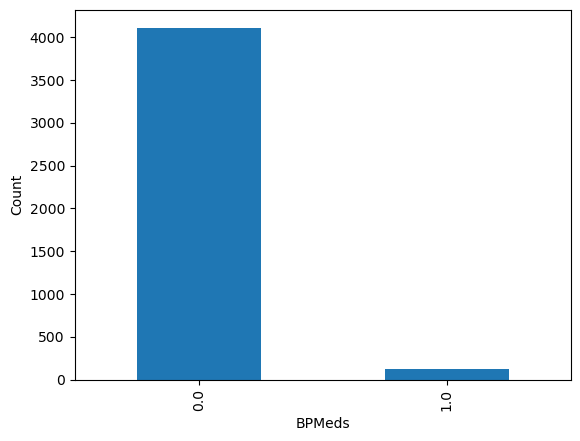

In [78]:
BPMeds_count.plot(kind="bar")
plt.xlabel("BPMeds")
plt.ylabel("Count")
plt.show()

## Visualizing the number of people with prevalentStroke

In [80]:
prevalentStroke_count = my_dataset["prevalentStroke"].value_counts()
prevalentStroke_count

0    4213
1      25
Name: prevalentStroke, dtype: int64

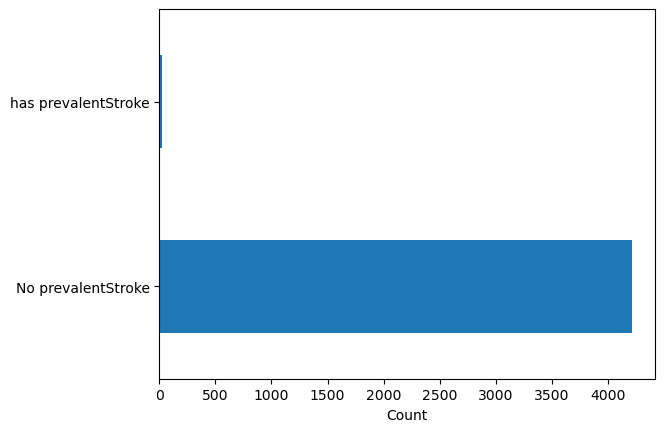

In [90]:
prevalentStroke_count.plot(kind="barh")
plt.yticks([0,1],["No prevalentStroke","has prevalentStroke"])
plt.xlabel("Count")
plt.show()

## Visualizing the number of people with prevalentHyp and those who don't have it

In [87]:
prevalentHyp_count = my_dataset["prevalentHyp"].value_counts()
prevalentHyp_count

0    2922
1    1316
Name: prevalentHyp, dtype: int64

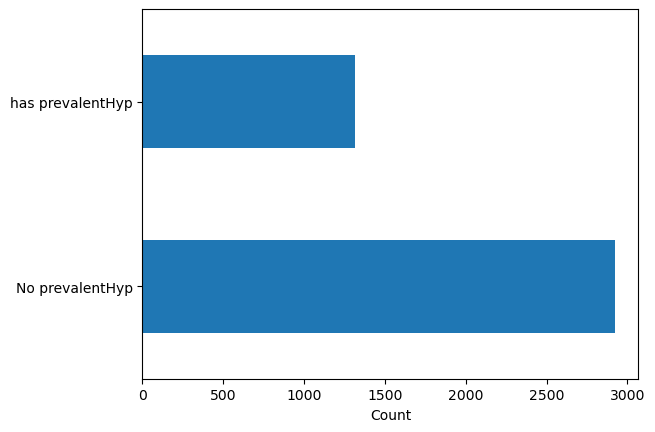

In [89]:
prevalentHyp_count.plot(kind="barh")
plt.yticks([0,1],["No prevalentHyp","has prevalentHyp"])
plt.xlabel("Count")
plt.show()

## Checking the number of people with Diabetes

In [91]:
diabetes_count = my_dataset["diabetes"].value_counts()
diabetes_count

0    4129
1     109
Name: diabetes, dtype: int64

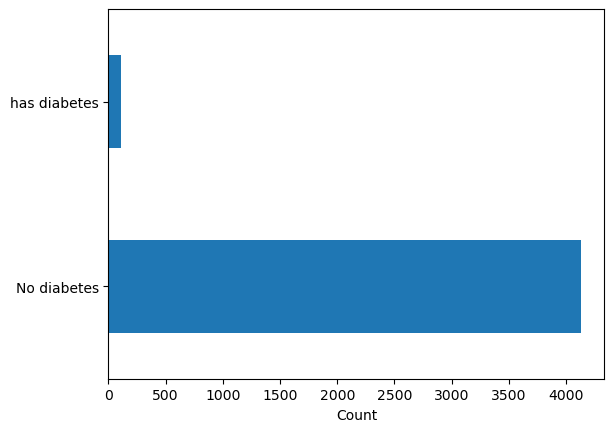

In [92]:
diabetes_count.plot(kind="barh")
plt.yticks([0,1],["No diabetes","has diabetes"])
plt.xlabel("Count")
plt.show()

## Distribution of the totChol

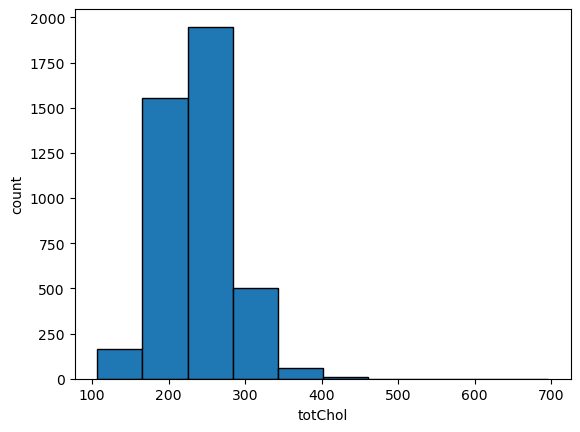

In [94]:
plt.hist(x=my_dataset["totChol"],edgecolor="black")
plt.xlabel("totChol")
plt.ylabel("count")
plt.show()

## Distribution of the sysBP

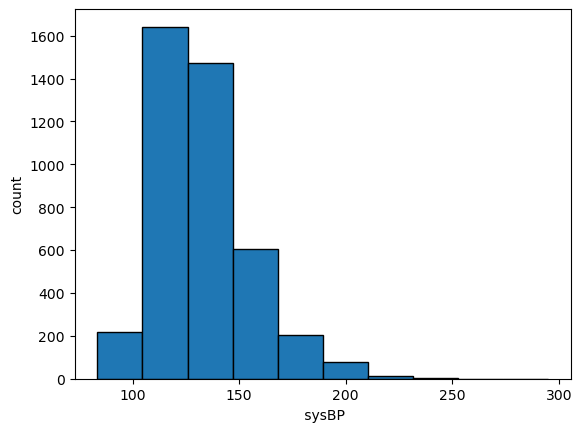

In [95]:
plt.hist(x=my_dataset["sysBP"],edgecolor="black")
plt.xlabel(" sysBP")
plt.ylabel("count")
plt.show()

# Distribution of diaBP

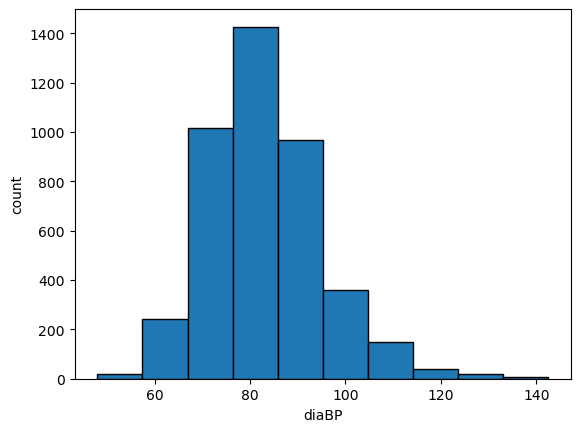

In [96]:
plt.hist(x=my_dataset["diaBP"],edgecolor="black")
plt.xlabel("diaBP")
plt.ylabel("count")
plt.show()

# Distribution of heartRate

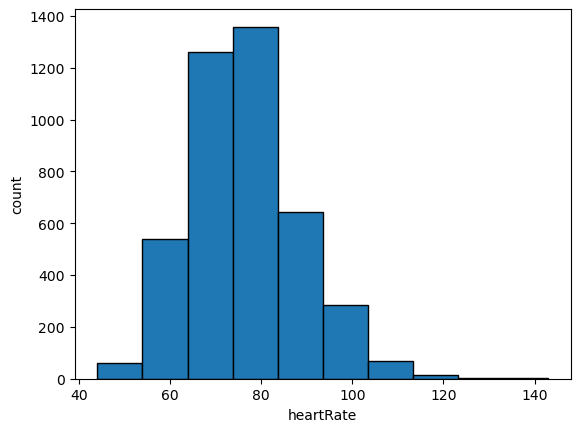

In [97]:
plt.hist(x=my_dataset["heartRate"],edgecolor="black")
plt.xlabel("heartRate")
plt.ylabel("count")
plt.show()

# Distribution of glucose

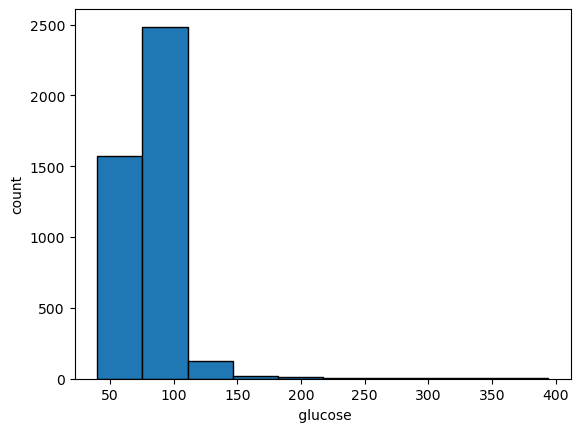

In [98]:
plt.hist(x=my_dataset["glucose"],edgecolor="black")
plt.xlabel(" glucose")
plt.ylabel("count")
plt.show()

# Building a machine learning model to predict heart diseases

In [99]:
my_dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.0,0


In [100]:
x = my_dataset.drop("TenYearCHD",axis=1)
y = my_dataset["TenYearCHD"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression()

In [105]:
model.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
x_test

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0
764,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0
3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0
1967,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,1,47,1.0,0,0.0,0.0,0,0,0,259.0,139.0,79.0,29.34,70.0,71.0
4056,1,44,2.0,0,0.0,0.0,0,0,0,254.0,130.0,80.0,28.15,80.0,74.0
4210,1,50,1.0,0,0.0,0.0,0,0,0,282.0,126.5,88.0,27.30,85.0,87.0
3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0


In [107]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [108]:
y_test

3188    0
764     0
3264    0
1967    0
2185    0
       ..
3303    1
4056    0
4210    0
3971    0
2540    0
Name: TenYearCHD, Length: 848, dtype: int64

# Accuracy of my model

In [112]:
model.score(x_test,y_test)

0.8537735849056604

In [142]:
input_values = (1, 39,  4.0,  0,  0.0,  0.0,  0,  0,  0,  195.0,  106.0,  70.0, 26.97, 80.0, 77.0)
input_values = np.array(input_values).reshape(1,-1)
prediction = model.predict(input_values)

if prediction==0:
    print("Has no heart disease")
else:
    print("Has heart disease")

Has no heart disease


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Confusion Matrix

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
cm = confusion_matrix(y_test,model.predict(x_test))
cm

array([[719,   5],
       [119,   5]], dtype=int64)

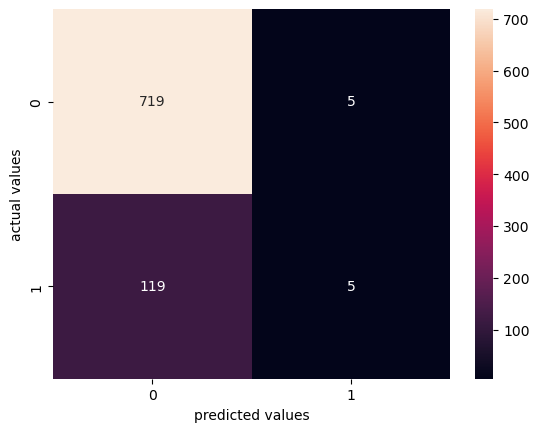

In [131]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.show()

## Saving the model

In [143]:
import pickle
filename = "heart_disease_prediction.sav"
pickle.dump(model,open(filename,"wb"))

## Loading the model

In [144]:
saved_model = pickle.load(open(filename,"rb"))

input_values = (1, 39,  4.0,  0,  0.0,  0.0,  0,  0,  0,  195.0,  106.0,  70.0, 26.97, 80.0, 77.0)
input_values = np.array(input_values).reshape(1,-1)
prediction = saved_model.predict(input_values)

if prediction==0:
    print("Has no heart disease")
else:
    print("Has heart disease")


Has no heart disease


C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
